In [36]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.inspection import permutation_importance
import shap
from matplotlib import pyplot as plt

plt.rcParams.update({'figure.figsize': (12.0, 8.0)})
plt.rcParams.update({'font.size': 14})

In [42]:
boston = load_boston()
X = pd.DataFrame(boston.data, columns=boston.feature_names)
y = boston.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=12)

In [43]:
rf = RandomForestRegressor()
rf.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [44]:
rf.feature_importances_

array([0.04054781, 0.00149293, 0.00576977, 0.00071805, 0.02944643,
       0.25261155, 0.01969354, 0.05781783, 0.0050257 , 0.01615872,
       0.01066154, 0.01185997, 0.54819617])

In [45]:
boston.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

<BarContainer object of 13 artists>

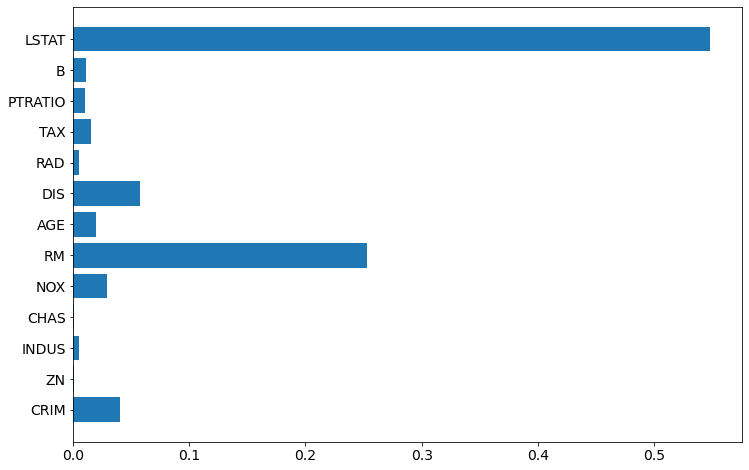

In [46]:
plt.barh(boston.feature_names, rf.feature_importances_)

In [15]:
# let's sort them for nicer plot

In [16]:
sorted_idx = rf.feature_importances_.argsort()

Text(0.5, 0, 'Random Forest Feature Importance')

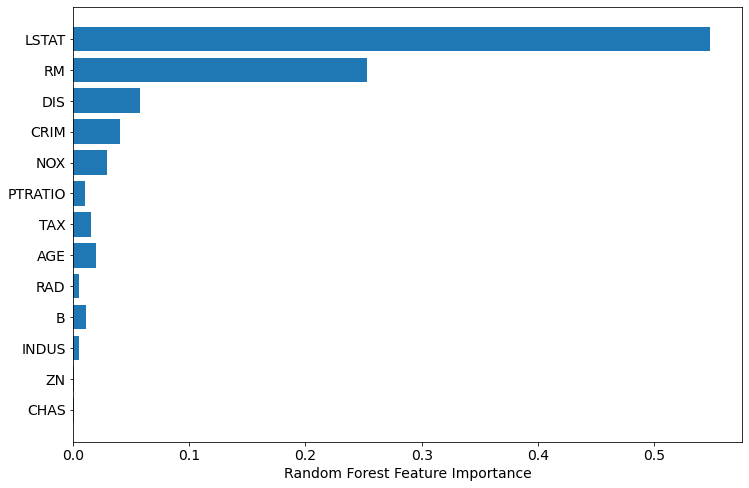

In [47]:
plt.barh(boston.feature_names[sorted_idx], rf.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")

In [48]:
perm_importance = permutation_importance(rf, X_test, y_test)

In [49]:
sorted_idx = perm_importance.importances_mean.argsort()

Text(0.5, 0, 'Permutation Importance')

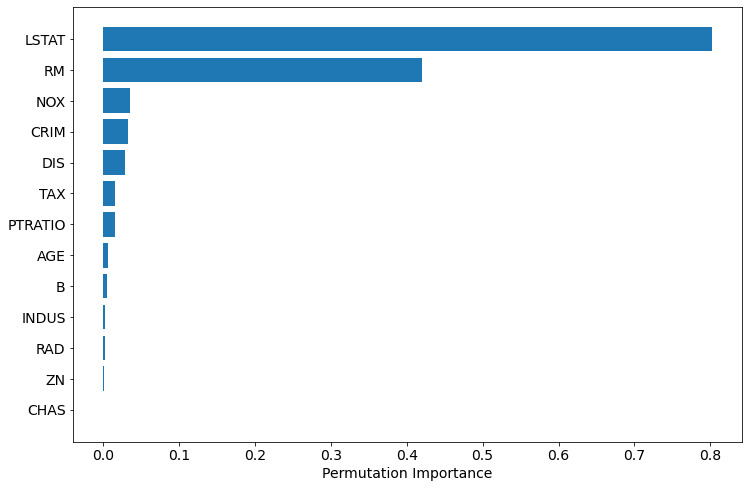

In [50]:
plt.barh(boston.feature_names[sorted_idx], perm_importance.importances_mean[sorted_idx])
plt.xlabel("Permutation Importance")

In [51]:
explainer = shap.TreeExplainer(rf)

Setting feature_perturbation = "tree_path_dependent" because no background data was given.


In [52]:
shap_values = explainer.shap_values(X_test)

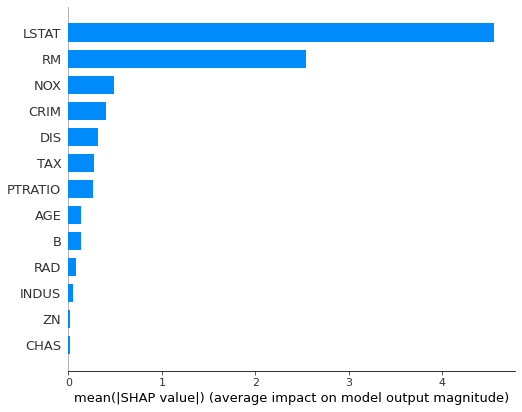

In [53]:
shap.summary_plot(shap_values, X_test, plot_type="bar")

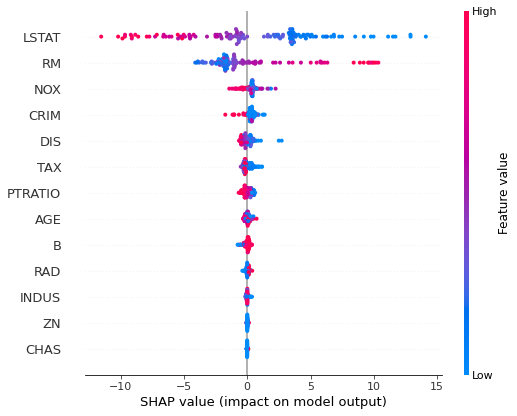

In [55]:
shap.summary_plot(shap_values, X_test)